In [96]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [97]:
experiment_sub_dir = "2025Apr28-221058_configs"
exp_path = os.path.join(r"D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

In [98]:
df

,epoch_type,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,episode_discounted_rewards_mean,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
0,training,200000,-87.846940,-33.984746,-51.122687,-50.447231,6.869753,-28.502582,-17.517173,-21.412421,...,-388.529479,-2.178189,135186.580678,24374.0,48.0,0 days 00:03:12.491371,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
1,training,400000,-79.931384,-34.306474,-49.144889,-48.410141,6.257841,-26.556644,-17.673921,-21.005252,...,-5.622498,-4.452573,3.956105,25000.0,48.0,0 days 00:03:28.000369,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
2,training,600000,-76.709991,-32.767444,-47.668188,-47.051168,5.739992,-27.526339,-17.551279,-20.756350,...,-6.272107,-5.232389,4.581661,25000.0,48.0,0 days 00:03:34.914465,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
3,training,800000,-72.213678,-33.979488,-45.986431,-45.355853,5.294832,-26.649617,-17.763900,-20.482032,...,-6.507550,-5.382627,4.813975,25000.0,48.0,0 days 00:03:38.813613,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
4,training,1000000,-73.902302,-34.756396,-45.838497,-45.254033,4.843641,-27.259482,-17.912853,-20.296424,...,-6.472827,-5.184474,4.834436,25000.0,56.0,0 days 00:03:36.461546,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,validation,3200000,-35.815986,-35.182176,-35.422082,-35.449769,0.103683,-19.181317,-19.075141,-19.148605,...,-6.214540,-4.144396,5.043570,NaN,NaN,0 days 00:00:00.612659,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
716,validation,3400000,-148.121696,-148.113298,-148.116909,-148.117127,0.002421,-30.426904,-30.425680,-30.426317,...,-8.543633,-8.900257,1.742940,NaN,NaN,0 days 00:00:00.603337,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
717,validation,3600000,-47.676146,-47.505092,-47.521076,-47.510798,0.036788,-17.338293,-17.293900,-17.296895,...,5.125109,6.187878,2.839546,NaN,NaN,0 days 00:00:00.596497,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
718,validation,3800000,-37.234634,-37.191102,-37.203633,-37.194573,0.017257,-16.635352,-16.634526,-16.634948,...,0.707686,1.879122,2.734984,NaN,NaN,0 days 00:00:00.621111,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...


In [99]:
df[df['epoch_type'] == 'validation']

,epoch_type,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,episode_discounted_rewards_mean,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
20,validation,200000,-36.367540,-32.961145,-33.067595,-32.961145,5.926876e-01,-19.014948,-17.403211,-17.453578,...,-3.901610,-2.450712,3.172004,NaN,NaN,0 days 00:00:00.608439,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
21,validation,400000,-31.973258,-31.973258,-31.973258,-31.973258,7.105427e-15,-17.512082,-17.512082,-17.512082,...,-5.582271,-4.563865,4.079859,NaN,NaN,0 days 00:00:00.654869,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
22,validation,600000,-30.888013,-30.888013,-30.888013,-30.888013,0.000000e+00,-17.434860,-17.434860,-17.434860,...,-6.202086,-5.300698,4.528518,NaN,NaN,0 days 00:00:00.608238,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
23,validation,800000,-33.883382,-33.781340,-33.784174,-33.781340,1.676918e-02,-17.821199,-17.812709,-17.812945,...,-5.961533,-4.760468,4.569227,NaN,NaN,0 days 00:00:00.619231,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
24,validation,1000000,-37.835409,-37.821875,-37.834942,-37.835409,2.469469e-03,-18.196567,-18.190977,-18.196374,...,-5.667332,-4.198868,4.448828,NaN,NaN,0 days 00:00:00.631483,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,validation,3200000,-35.815986,-35.182176,-35.422082,-35.449769,1.036831e-01,-19.181317,-19.075141,-19.148605,...,-6.214540,-4.144396,5.043570,NaN,NaN,0 days 00:00:00.612659,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
716,validation,3400000,-148.121696,-148.113298,-148.116909,-148.117127,2.420964e-03,-30.426904,-30.425680,-30.426317,...,-8.543633,-8.900257,1.742940,NaN,NaN,0 days 00:00:00.603337,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
717,validation,3600000,-47.676146,-47.505092,-47.521076,-47.510798,3.678785e-02,-17.338293,-17.293900,-17.296895,...,5.125109,6.187878,2.839546,NaN,NaN,0 days 00:00:00.596497,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...
718,validation,3800000,-37.234634,-37.191102,-37.203633,-37.194573,1.725696e-02,-16.635352,-16.634526,-16.634948,...,0.707686,1.879122,2.734984,NaN,NaN,0 days 00:00:00.621111,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5,0002_agent_params.args_.action_w_noise_amplitu...


In [100]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude    0.1
Name: 1, dtype: object
Best mean reward: -37.35257708058764


In [101]:
averaged_results

,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,episode_rewards_mean,sub_experiment_path
0,0,-37.468073,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,0.1,-37.352577,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,0.3,-58.035737,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


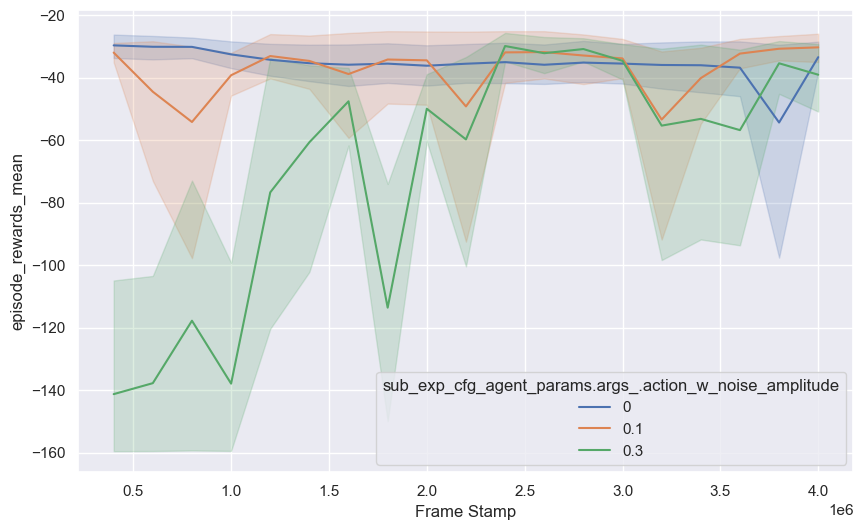

In [102]:
selected_metric = 'episode_rewards_mean'
hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# Filter for validation episodes
validation_df = df[df['epoch_type'] == 'validation']

# Get the unique sorted frame_stamp values
unique_frames = np.sort(validation_df['frame_stamp'].unique())
N = 1
# Get all frame_stamp values after the first N unique ones
filtered_frames = unique_frames[N:]

# Filter the DataFrame to only include rows with these frame_stamp values
filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.show()

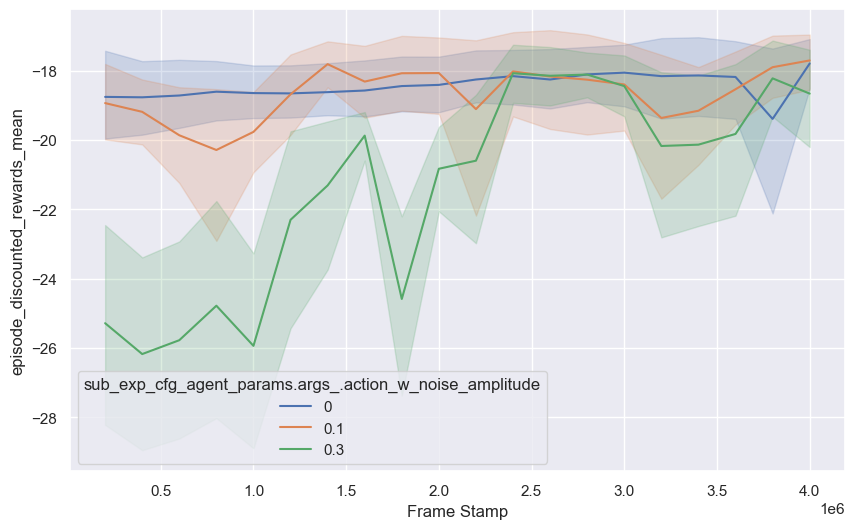

In [103]:

selected_metric = 'episode_discounted_rewards_mean'
hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

validation_df = df[df['epoch_type'] == 'validation']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue=hue_col)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [104]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude
39,validation,4000000,-37.512309,35.000000,-18.224805,NaN,NaN,0 days 00:00:00.621904,0,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
79,validation,4000000,-24.147195,17.000000,-15.912620,NaN,NaN,0 days 00:00:00.748065,1,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
119,validation,4000000,-40.291623,37.000000,-19.007259,NaN,NaN,0 days 00:00:00.676689,2,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
159,validation,4000000,-34.811461,30.058824,-17.785942,NaN,NaN,0 days 00:00:00.618050,3,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
199,validation,4000000,-24.912896,20.000000,-16.021906,NaN,NaN,0 days 00:00:00.629085,4,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
239,validation,4000000,-38.556382,34.033333,-18.664309,NaN,NaN,0 days 00:00:00.732628,5,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
279,validation,4000000,-24.516744,19.000000,-16.045336,NaN,NaN,0 days 00:00:00.761931,0,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.1
319,validation,4000000,-37.014267,29.000000,-19.644943,NaN,NaN,0 days 00:00:00.714108,1,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.1
359,validation,4000000,-27.101135,22.021739,-16.979989,NaN,NaN,0 days 00:00:00.822993,2,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.1
399,validation,4000000,-39.918145,50.000000,-18.431544,NaN,NaN,0 days 00:00:00.613068,3,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.1


In [105]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg_agent_params" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,episode_discounted_rewards_mean
0,0,-17.602807
1,0.1,-17.460142
2,0.3,-18.866759


In [106]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude'],
      dtype='object')

In [107]:
sub_df[[
    "episode_discounted_rewards_mean", "episode_frames_mean",
    "seed", "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"]
]

,episode_discounted_rewards_mean,episode_frames_mean,seed,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude
39,-18.224805,35.000000,0,0
79,-15.912620,17.000000,1,0
119,-19.007259,37.000000,2,0
159,-17.785942,30.058824,3,0
199,-16.021906,20.000000,4,0
239,-18.664309,34.033333,5,0
279,-16.045336,19.000000,0,0.1
319,-19.644943,29.000000,1,0.1
359,-16.979989,22.021739,2,0.1
399,-18.431544,50.000000,3,0.1


In [108]:
sub_df[
    (sub_df["sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"] == "0.3") 
]

,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude
519,validation,4000000,-42.651601,34.000000,-20.664892,NaN,NaN,0 days 00:00:00.574148,0,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
559,validation,4000000,-25.393580,19.000000,-16.164543,NaN,NaN,0 days 00:00:00.569394,1,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
599,validation,4000000,-36.556624,34.033333,-19.319787,NaN,NaN,0 days 00:00:00.568987,2,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
639,validation,4000000,-25.175170,18.000000,-16.368819,NaN,NaN,0 days 00:00:00.546558,3,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
679,validation,4000000,-66.715209,49.000000,-23.868490,NaN,NaN,0 days 00:00:00.572602,4,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
719,validation,4000000,-37.491974,50.000000,-16.814022,NaN,NaN,0 days 00:00:00.560205,5,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3


In [109]:
# Print the experiment_name of the row with the highest episode_rewards_mean 
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['experiment_name'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['episode_rewards_mean'].values[0])


D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Apr28-221058_configs\0000_agent_params.args_.action_w_noise_amplitude_0\1


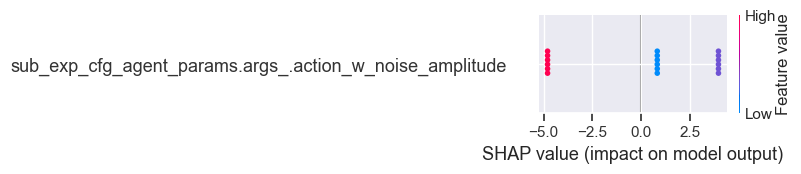

In [110]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [111]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.action_w_noise_amplitude']

In [112]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


IndexError: list index out of range